# Wrangle

In [11]:
import numpy as np
import pandas as pd
import requests
import json
import re

# Gathering data
主要采集并形成三个数据表，如下：
-   df_twitter_enhanced 基础信息
-   image_predictions 图像预测
-   tweets_jsons 附加信息

## df_twitter_enhanced
读取twitter-archive-enhanced.csv文件，并将其内存储的表转化为df_twitter_enhanced

In [18]:
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv') # read twitter-arcieve-enhanced.csv into df_twitter_enhanced
df_twitter_enhanced # display the dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## df_twitter_enhanced
读取已经下载好的tweet_json.txt文件，并将其内所需数据tweets_id,tweets_retweet_count, tweets_favorite_count
写入tweet_jsons中，以DataFrame的形式

In [12]:
tweets_list = []
file = open('tweet_json.txt', 'r')
for line in file.readlines():
        dic = json.loads(line)
        tweets_id = dic['id']
        tweets_retweet_count = dic['retweet_count']
        tweets_favorite_count = dic['favorite_count']
        tweets_list.append({'tweet_id':tweets_id,
                           'retweet_count':tweets_retweet_count,
                           'favorite_count':tweets_favorite_count})
tweet_jsons = pd.DataFrame(tweets_list,columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [4]:
tweet_jsons.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [5]:
tweet_jsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## image_predictions
以request的方式，将URL里的内容已经下载好，并存入image_predictions.tsv文件中。

In [16]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

In [19]:
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assessing data
-   df_twitter_enhanced 基础信息
-   image_predictions 图像预测
-   tweets_jsons 附加信息

In [7]:
df_twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_twitter_enhanced[df_twitter_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
df_twitter_enhanced[df_twitter_enhanced.rating_denominator!= 10] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [11]:
df_twitter_enhanced[df_twitter_enhanced.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [13]:
df_twitter_enhanced['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [14]:
df_twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [17]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [18]:
image_predictions[image_predictions.p1_conf.isnull()] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
image_predictions[image_predictions.p1_conf >1 ] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
image_predictions[image_predictions.jpg_url.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## df_twitter_enhanced 
### tidiness
- 新建一个state列,整合doggo、floofer、pupper、puppo

### quality
- rating_denominator异常值
- doggo、floofer、pupper、puppo列缺失
- 去除retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，in_reply_to_status_id，in_reply_to_user_id几列无用列
- tweet_id应为char，in_reply_to_status_id，in_reply_to_user_id 数据类型应为char
- timestamp应为datetime
- source的词文提取
- 将name中的无意义词提取转为None
- 转name中的None为NaN
- 删除expanded_urls中的NaN值

## image_predictions 
### tidiness
- 把image_predictions，df_twitter_enhanced和tweet_json连接成一个表，twitter_archive_master

### quality
- tweet_id 为char

# Cleanning

In [20]:
df_twitter_enhanced_clean = df_twitter_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_jsons_clean = tweet_jsons.copy()

### quality 1
#### df_twitter_enhanced:
- 为了减少无用数据，去除retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，in_reply_to_status_id，in_reply_to_user_id几列无用列

In [23]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis = 1)

In [24]:
df_twitter_enhanced_clean.head(6)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


### quality 2
#### df_twitter_enhanced:
- rating_denominator异常值

In [25]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean[df_twitter_enhanced_clean.rating_denominator == 10] 

In [26]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.rating_denominator!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### quality 3
#### df_twitter_enhanced:
- 删除expanded_urls中的NaN值

In [27]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean[df_twitter_enhanced_clean.expanded_urls.notnull()]

In [28]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### quality 4
#### df_twitter_enhanced:
- 转name中的错误名字为None

In [29]:
df_twitter_enhanced_clean['name'] = df_twitter_enhanced_clean['name'].apply(lambda x:None if x.isupper()|x.islower() else x)

In [30]:
df_twitter_enhanced_clean['name'].value_counts()

None         673
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
Toby           7
Bailey         7
Daisy          7
Buddy          7
Leo            6
Milo           6
Rusty          6
Dave           6
Koda           6
Jack           6
Oscar          6
Scout          6
Bella          6
Stanley        6
Jax            6
Bentley        5
Alfie          5
Finn           5
Larry          5
            ... 
Pavlov         1
Suki           1
Creg           1
Maisey         1
Kollin         1
Dotsy          1
Ester          1
Edgar          1
Lili           1
Bronte         1
Grizzie        1
Mollie         1
Teddy          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Socks          1
Eazy           1
Kane           1
Finnegus       1
Alexander      1
Meatball      

k=[]
for x in df_twitter_enhanced_clean['name'].unique():
    break
print(x)

### quality 5
#### df_twitter_enhanced:
- 转name中的None为NaN

In [31]:
df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.replace('None',np.NaN)

In [32]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### quality 6
df_twitter_enhanced 和  image_predictions 中的不同的列各有数据类型上的质量问题如：
#### df_twitter_enhanced:
- tweet_id应为char
- timestamp应为datetime

#### image_predictions:
- tweet_id应为char


In [33]:
df_twitter_enhanced_clean.tweet_id = df_twitter_enhanced_clean.tweet_id.astype('str')
df_twitter_enhanced_clean.timestamp = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

In [34]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null datetime64[ns]
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 231.4+ KB


In [35]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.0+ KB


### quality 7
#### df_twitter_enhanced:
- source的词文提取

In [36]:
df_twitter_enhanced_clean.source = df_twitter_enhanced_clean.source.str.extract('>(.*)</a>',expand = True)
df_twitter_enhanced_clean.source  = df_twitter_enhanced_clean.source.astype('category')

In [37]:
df_twitter_enhanced_clean.source.value_counts()

Twitter for iPhone     2144
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

In [38]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null datetime64[ns]
source                2278 non-null category
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 216.0+ KB


### tidiness1
#### df_twitter_enhanced:
- 新建一个state列,整合doggo、floofer、pupper、puppo

In [39]:
df_twitter_enhanced_clean['state'] = df_twitter_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)',expand =True)

In [40]:
df_twitter_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,state
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


### quality 8
#### df_twitter_enhanced:
- doggo、floofer、pupper、puppo列缺失

In [41]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['puppo','pupper','floofer','doggo'],axis=1)

In [42]:
df_twitter_enhanced_clean.tail(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,state
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,NaN
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,NaN
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,NaN
2355,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN


### tidiness 2
- 把image_predictions，df_twitter_enhanced和tweet_jsons连接成一个表twitter_archive_master


In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [44]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [45]:
tweet_jsons_clean.tail()

,tweet_id,retweet_count,favorite_count
2347,666049248165822465,41,111
2348,666044226329800704,147,309
2349,666033412701032449,47,128
2350,666029285002620928,48,132
2351,666020888022790149,530,2528


In [46]:
df_twitter_enhanced_clean = pd.merge(left=df_twitter_enhanced_clean,right=tweet_jsons_clean,
                                 on='tweet_id',how = 'left')
df_twitter_enhanced_clean = pd.merge(left=df_twitter_enhanced_clean,right=image_predictions_clean,
                                 on='tweet_id',how = 'left')

In [47]:
twitter_archive_master = df_twitter_enhanced_clean

In [48]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,state,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [49]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,state,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
438,817502432452313088,2017-01-06 22:45:43,Twitter for iPhone,RT @dog_rates: Meet Herschel. He's slightly bi...,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,pupper,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,720775346191278080,2016-04-15 00:46:48,Twitter for iPhone,This is Berkeley. He's in a predicament. 10/10...,https://twitter.com/dog_rates/status/720775346...,10,10,Berkeley,NaN,NaN,...,1.0,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True
435,817827839487737858,2017-01-07 20:18:46,Twitter for iPhone,This is Buddy. He ran into a glass door once. ...,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,NaN,NaN,...,1.0,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
45,883360690899218434,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer,NaN,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1485,689623661272240129,2016-01-20 01:41:08,Twitter for iPhone,This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,pupper,NaN,...,1.0,toy_poodle,0.279604,True,mashed_potato,0.208564,False,Labrador_retriever,0.077481,True


In [50]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 22 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null datetime64[ns]
source                2278 non-null category
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
state                 384 non-null object
retweet_count         0 non-null float64
favorite_count        0 non-null float64
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 

# Iteration
在准备分析时，发现tweet_jsons里的retweet_count和favorite_count值并没有添加到twitter_archive_master.csv中。

In [14]:
tweet_jsons_clean = tweet_jsons.copy()

In [8]:
twitter_archive_master = twitter_archive_master.drop(['retweet_count','favorite_count'],axis=1)

In [9]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 20 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
state                 384 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
dtypes: float64(4), int64(3), obj

In [15]:
twitter_archive_master =  pd.merge(left=twitter_archive_master,right=tweet_jsons_clean,
                                 on='tweet_id',how = 'left')

In [16]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 22 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
state                 384 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
retweet_count         2275 non-nu

# Storing data
将整理好的数据放到twitter_archive_master.csv的文件中

In [17]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index = False)

In [52]:
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,state,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [53]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 22 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
state                 384 non-null object
retweet_count         0 non-null float64
favorite_count        0 non-null float64
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null fl

# Act
主要分析这四个问题：
- 端口数的占比
- 评分的分布
- P1中预测中的种类数目前三
- P1占比最多的10种类别中，哪种狗狗的retweet_counts和favorite_count的数目最多


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [22]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 22 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  1497 non-null object
state                 384 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
retweet_count         2275 non-nu

- 端口数的占比

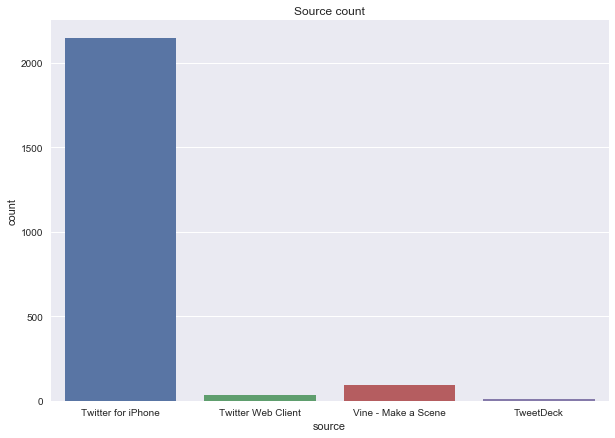

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x='source',data =twitter_archive_master )
plt.title('Source count')

- 评分的分布

plt.figure(figsize=(10,7))
sns.countplot(twitter_archive_master.rating_numerator)
plt.title('Score_of_dogs distribution')

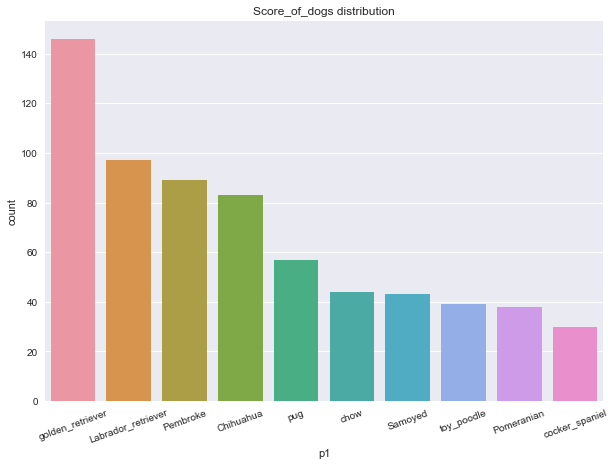

In [62]:
plt.figure(figsize=(10,7))
sns.countplot(x="p1",data=twitter_archive_master,
              order=twitter_archive_master.p1.value_counts().iloc[:10].index)
plt.xticks(rotation=20)
plt.title('TOP10 of p1 predictions')

- P1中预测中的种类数目前三
- P1占比最多的10种类别中，哪种狗狗的retweet_counts和favorite_count的数目最多

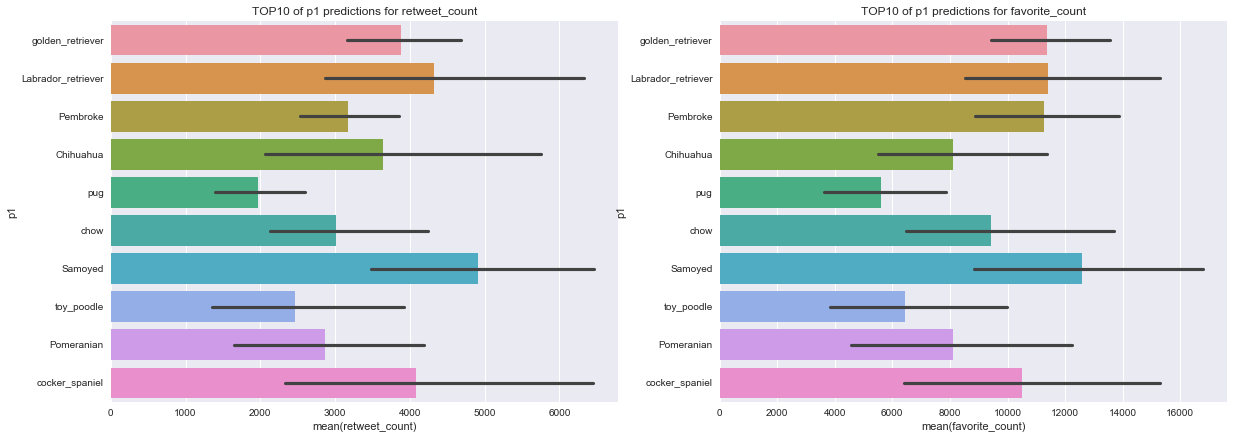

In [68]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sns.barplot(y="p1",x="retweet_count",data=twitter_archive_master,
              order=twitter_archive_master.p1.value_counts().iloc[:10].index)
plt.title('TOP10 of p1 predictions for retweet_count')

plt.subplot(122)
sns.barplot(y="p1",x="favorite_count",data=twitter_archive_master,
              order=twitter_archive_master.p1.value_counts().iloc[:10].index)
plt.title('TOP10 of p1 predictions for favorite_count')
